In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


In [2]:
!ls '/content/drive/My Drive/app'

cats_and_dogs_small	  fashion_datasets.ipynb  Untitled0.ipynb
convnet_dropout.ipynb	  fashion_mnist.ipynb	  Untitled1.ipynb
convnetScratch.ipynb	  mnist_cnn.py
deeplearing_turkey.ipynb  Titanic.csv


In [0]:
import os , shutil

In [0]:
base_dir = '/content/drive/My Drive/app/cats_and_dogs_small'

In [0]:
train_dir = os.path.join(base_dir,'train')
#os.mkdir(train_dir)
validation_dir =os.path.join(base_dir,'validation')
#os.mkdir(validation_dir)
test_dir = os.path.join(base_dir,'test')
#os.mkdir(test_dir)

In [0]:
train_cats_dir = os.path.join(train_dir,'cats')
#os.mkdir(train_cats_dir)
train_dogs_dir = os.path.join(train_dir,'dogs')
#os.mkdir(train_dogs_dir)

In [0]:
validation_cats_dir = os.path.join(validation_dir,'cats')
#os.mkdir(validation_cats_dir)
validation_dogs_dir = os.path.join(validation_dir,'dogs')
#os.mkdir(validation_dogs_dir)

In [0]:
test_cats_dir = os.path.join(test_dir,'cats')
#os.mkdir(test_cats_dir)
test_dogs_dir = os.path.join(test_dir,'dogs')
#os.mkdir(test_dogs_dir)

In [9]:
print('total training cat images :: ' , len(os.listdir(train_cats_dir)))
print('total training dog images :: ' , len(os.listdir(train_dogs_dir)))

total training cat images ::  1000
total training dog images ::  1000


In [10]:
print('total validation cat images :: ' ,len(os.listdir(validation_cats_dir)))
print('total validation dog images :: ' ,len(os.listdir(validation_dogs_dir)))

total validation cat images ::  500
total validation dog images ::  500


In [11]:
print('total test cat images :: ', len(os.listdir(test_cats_dir)))
print('total test dog images :: ', len(os.listdir(test_dogs_dir)))

total test cat images ::  500
total test dog images ::  500


In [12]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))


Using TensorFlow backend.


In [0]:
from keras import optimizers
model.compile(loss='binary_crossentropy',
             optimizer=optimizers.RMSprop(lr=1e-4),
             metrics=['acc'])

Lets train the convnet using data - augmentation generators

In [0]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
rescale=1./255,
rotation_range=40,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,)

In [0]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [16]:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                   target_size=(150,150),
                                                   batch_size=32,
                                                          class_mode='binary')

Found 2000 images belonging to 2 classes.


In [17]:
validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                       target_size=(150,150),
                                                       batch_size=32,
                                                       class_mode='binary')

Found 1000 images belonging to 2 classes.


In [19]:

history = model.fit_generator(train_generator,steps_per_epoch=100,epochs=30,validation_data=validation_generator,validation_steps=50)

Epoch 1/30
100/100 [==============================] - 1496s 15s/step - loss: 0.6943 - acc: 0.5188 - val_loss: 0.6831 - val_acc: 0.5273
Epoch 2/30
100/100 [==============================] - 38s 384ms/step - loss: 0.6845 - acc: 0.5497 - val_loss: 0.6774 - val_acc: 0.5483
Epoch 3/30
100/100 [==============================] - 38s 384ms/step - loss: 0.6665 - acc: 0.5934 - val_loss: 0.6396 - val_acc: 0.6358
Epoch 4/30
100/100 [==============================] - 39s 386ms/step - loss: 0.6501 - acc: 0.6163 - val_loss: 0.6290 - val_acc: 0.6450
Epoch 5/30
100/100 [==============================] - 38s 380ms/step - loss: 0.6321 - acc: 0.6441 - val_loss: 0.6103 - val_acc: 0.6580
Epoch 6/30
100/100 [==============================] - 38s 382ms/step - loss: 0.6220 - acc: 0.6537 - val_loss: 0.5725 - val_acc: 0.7043
Epoch 7/30
100/100 [==============================] - 38s 381ms/step - loss: 0.5936 - acc: 0.6816 - val_loss: 0.5675 - val_acc: 0.6935
Epoch 8/30
100/100 [==============================] - 3

In [0]:
model.save('cats_and_dogs_small_3.h5')

In [25]:
from keras.models import load_model
model = load_model('cats_and_dogs_small_3.h5')
model.summary()  

img_path = '/content/drive/My Drive/app/c1.jpg'
from keras.preprocessing import image
import numpy as np
img = image.load_img(img_path,target_size=(150,150))
img_tensor =image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor,axis=0)
img_tensor/=255 


print(img_tensor.shape)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
__________

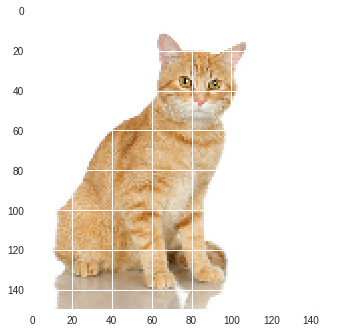

In [26]:
import matplotlib.pyplot as plt
plt.imshow(img_tensor[0])
plt.show()

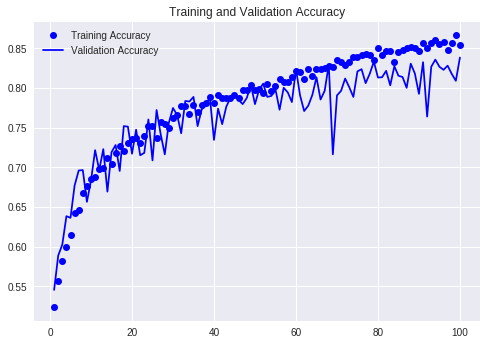

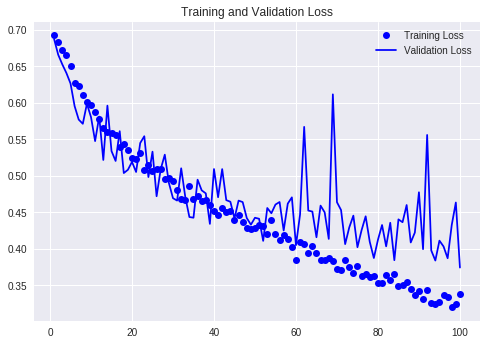

In [0]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['acc']
val_acc = history.history['val_acc']

epochs = range(1, len(acc)+1)

plt.plot(epochs,acc , 'bo' , label='Training Accuracy')
plt.plot(epochs , val_acc, 'b', label = 'Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.figure()

plt.plot(epochs , loss ,'bo' ,label = 'Training Loss')
plt.plot(epochs , val_loss,'b' ,label = 'Validation Loss')
plt.title('Training and Validation Loss')

plt.legend()
plt.show()